In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\Admin\Downloads\Drowsiness detection\train',
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r'C:\Users\Admin\Downloads\Drowsiness detection\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2597 images belonging to 2 classes.
Found 359 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'closed eyes': 0, 'open eyes': 1}

In [7]:
result = classifier.fit(training_set,
                         epochs=15, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/15
82/82 [==============================] - 51s 601ms/step - loss: 0.5663 - accuracy: 0.7035 - val_loss: 0.4913 - val_accuracy: 0.8273
Epoch 2/15
82/82 [==============================] - 3s 32ms/step - loss: 0.5167 - accuracy: 0.7035 - val_loss: 0.5574 - val_accuracy: 0.8273
Epoch 3/15
82/82 [==============================] - 3s 32ms/step - loss: 0.4176 - accuracy: 0.7905 - val_loss: 0.5464 - val_accuracy: 0.7354
Epoch 4/15
82/82 [==============================] - 3s 32ms/step - loss: 0.3139 - accuracy: 0.8926 - val_loss: 0.8994 - val_accuracy: 0.4150
Epoch 5/15
82/82 [==============================] - 3s 32ms/step - loss: 0.2731 - accuracy: 0.8991 - val_loss: 0.9472 - val_accuracy: 0.4178
Epoch 6/15
82/82 [==============================] - 3s 32ms/step - loss: 0.2419 - accuracy: 0.9099 - val_loss: 1.0110 - val_accuracy: 0.4150
Epoch 7/15
82/82 [==============================] - 3s 33ms/step - loss: 0.2229 - accuracy: 0.9137 - val_loss: 0.9923 - val_accuracy: 0.4401
Epoch 8/15


In [14]:
result = classifier.fit(test_set,
                         epochs=15, # iteration or repeat 
                         validation_data = training_set)

Epoch 1/15
12/12 [==============================] - 2s 201ms/step - loss: 0.4994 - accuracy: 0.8162 - val_loss: 0.7518 - val_accuracy: 0.7035
Epoch 2/15
12/12 [==============================] - 2s 185ms/step - loss: 0.4374 - accuracy: 0.8273 - val_loss: 0.4962 - val_accuracy: 0.7104
Epoch 3/15
12/12 [==============================] - 2s 186ms/step - loss: 0.4087 - accuracy: 0.8273 - val_loss: 0.5168 - val_accuracy: 0.7624
Epoch 4/15
12/12 [==============================] - 2s 183ms/step - loss: 0.3426 - accuracy: 0.8607 - val_loss: 0.4265 - val_accuracy: 0.8394
Epoch 5/15
12/12 [==============================] - 2s 185ms/step - loss: 0.3273 - accuracy: 0.8635 - val_loss: 0.4571 - val_accuracy: 0.8398
Epoch 6/15
12/12 [==============================] - 2s 185ms/step - loss: 0.3134 - accuracy: 0.8719 - val_loss: 0.5365 - val_accuracy: 0.8275
Epoch 7/15
12/12 [==============================] - 2s 190ms/step - loss: 0.3059 - accuracy: 0.8663 - val_loss: 0.5015 - val_accuracy: 0.8379
Epoch 

In [8]:
classifier.save('drowsiness.h5')

In [9]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
model = load_model("drowsiness.h5")

In [11]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("Good")
    else:
        print("Alert")

In [28]:
import os 
os.chdir(r"C:\Users\Hp\Desktop\Python Code\TensorFlow\CNN\Drowsiness")

1/1 [==============================] - 0s 144ms/step
Probability :  0.99399674
Good


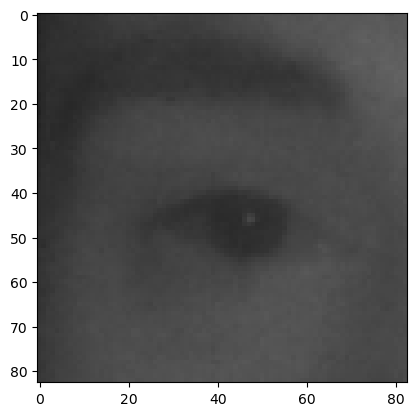

In [13]:
model_output(r"C:\Users\Admin\Downloads\Drowsiness detection\train\open eyes\s0001_01891_0_0_1_0_0_01.png")

1/1 [==============================] - 0s 25ms/step
Probability :  0.053614147
Alert


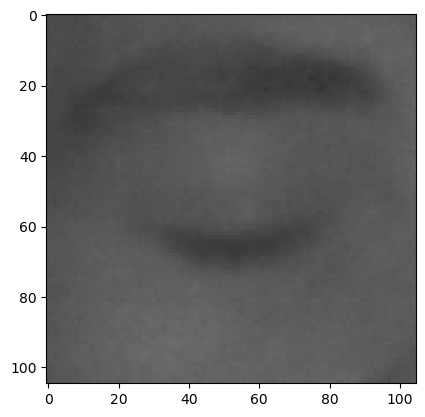

In [14]:
model_output(r"C:\Users\Admin\Downloads\Drowsiness detection\train\closed eyes\s0001_00055_0_0_0_0_0_01.png")

In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from imutils.video import VideoStream
import time

# Load the pre-trained drowsiness detection CNN model
model = load_model("drowsiness.h5")
FRAME_WIDTH = 800
FRAME_HEIGHT = 600
CONFIDENCE_THRESHOLD = 0.5

# Start the video stream
import cv2
cap = cv2.VideoCapture(1)
vs = VideoStream(src=0).start()
time.sleep(2)

while True:
    frame = vs.read()
    frame = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))

    # Preprocess the frame for the model
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (64, 64))
    frame = img_to_array(frame)
    frame = preprocess_input(frame)
    frame = np.expand_dims(frame, axis=0)

    # Make predictions using the drowsiness detection model
    predictions = model.predict(frame)

    if predictions[0][0] > CONFIDENCE_THRESHOLD:  # Assuming index 0 corresponds to drowsy class
        cv2.putText(frame, "Good", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    else:
        cv2.putText(frame, "Alert", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Drowsiness_Detection", 224)
    key = cv2.waitKey(10) & 0xFF

if key == ord("q"):
        break

cv2.destroyAllWindows()
vs.stop()

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


KeyboardInterrupt: 